In [45]:
import pandas as pd
import os

import config

from utils.evaluation_utils import print_ensemble_results, get_best_epoch
from utils.load_utils import load_image
from utils.label_eval_utils import *


In [ ]:
STAGE = 'ss'
MOD_PREFIX = "mod_2"

In [2]:
# PATH_TO_ANOMSCORES = config.PATH_TO_ANOM
# PATH_TO_RESULTS = config.PATH_TO_RESULTS
# path_to_scores = os.path.join(PATH_TO_ANOMSCORES, 'ss')
# path_to_results = os.path.join(PATH_TO_RESULTS, 'ss')
# print_ensemble_results(path_to_anom_scores=path_to_scores, epoch=400, stage='ss', metric='centre_mean', meta_data_dir=None, get_oarsi_results=False, model_name_prefix="mod_1", seed = 1001)
# metrics = ['auc', 'auc_mid', 'auc_mid2', 'auc_sev', 'spearman']
# best_epochs = get_best_epoch(path_to_results, last_epoch=0, metric='auc', model_prefix='mod_1')
# best_epochs

## Visualize Results AS

### KL Score vs. Anom Count

In [ ]:
x = 'label'
y = 'anoms_count'
values = ['label', 'anoms_count', 'sim', 'av']
x_title = 'KL Score'
y_title = 'Count Anomalities'

SAVE_PATH = config.OUTPUT_PATH
pseudolabels_path= os.path.join(SAVE_PATH, 'pseudolabels')

pseudolabel_name = "ss_training_mod_2_epoch_400_margin_0.8.csv"
pseudolabel_names = []

# save_path = os.path.join(SAVE_PATH, 'graphs')
# os.makedirs(save_path, exist_ok=True)

In [5]:
df = pd.read_csv(os.path.join(pseudolabels_path, pseudolabel_name), index_col=False)

In [6]:
df['anoms_count'].value_counts()

anoms_count
0     5093
1      276
2       87
10      59
3       50
5       42
4       40
8       39
9       33
7       32
6       27
Name: count, dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'label', 'col_1001', 'col_71530', 'col_138647',
       'col_875688', 'col_985772', 'col_44', 'col_34', 'col_193', 'col_244959',
       'col_8765', 'av', 'std', 'anom_1001', 'anom_71530', 'anom_138647',
       'anom_875688', 'anom_985772', 'anom_44', 'anom_34', 'anom_193',
       'anom_244959', 'anom_8765', 'anoms_count', 'sim', 'sim>95th'],
      dtype='object')

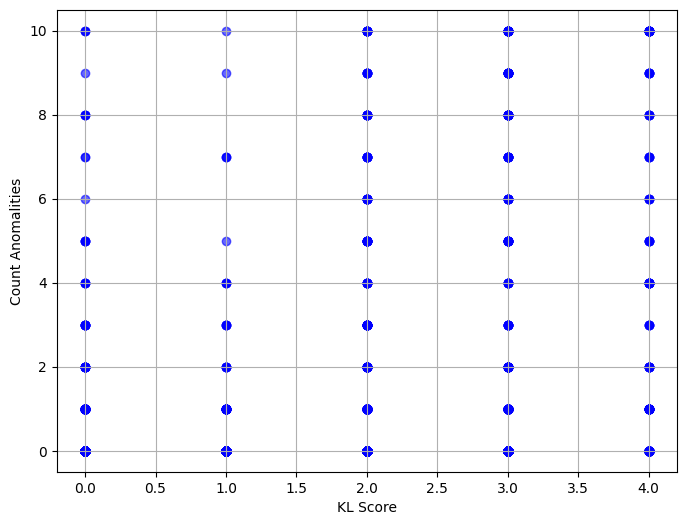

In [8]:
scatter_plot(df, x=x, y=y, x_title=x_title,y_title=y_title)

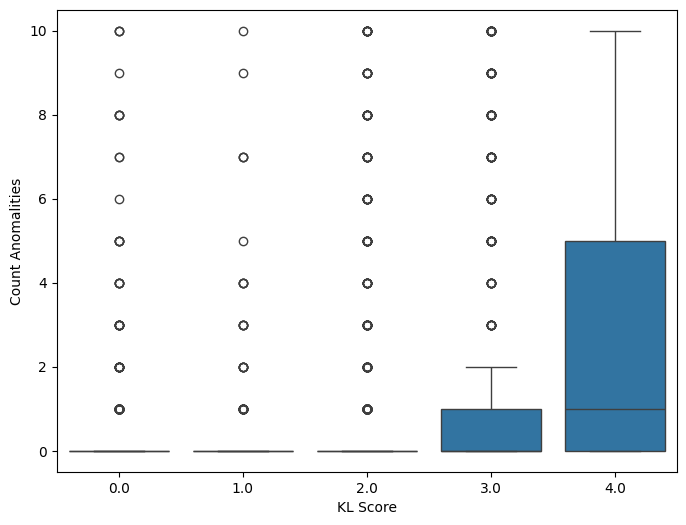

In [9]:
boxplot(df, x, x_title, y, y_title)

In [10]:
x = 'label'
y = 'av'
x_title = 'KL Score'
y_title = 'Average AS'

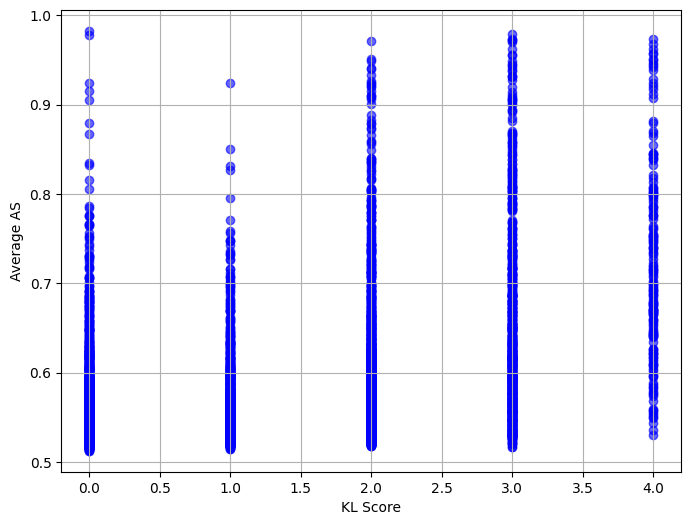

In [11]:
scatter_plot(df, x=x, y=y, x_title=x_title,y_title=y_title)

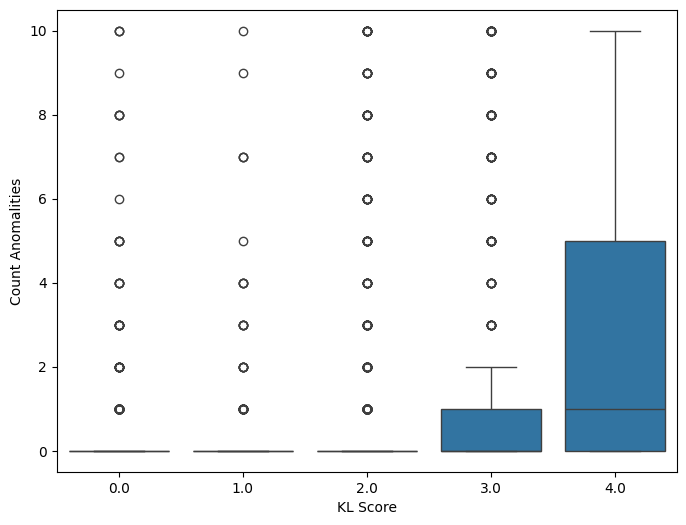

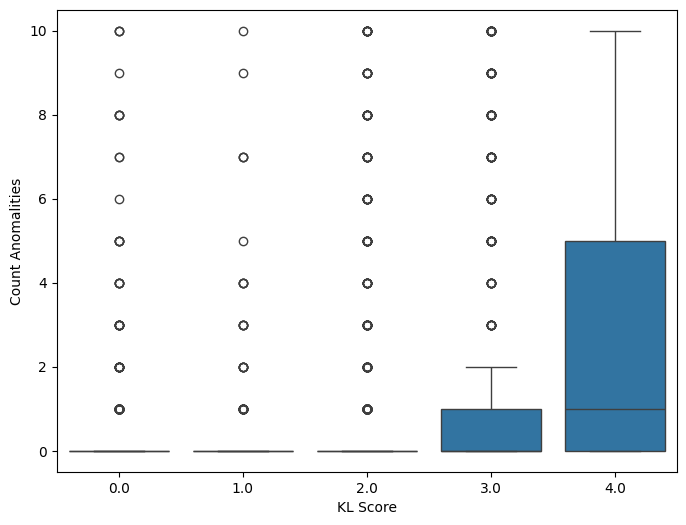

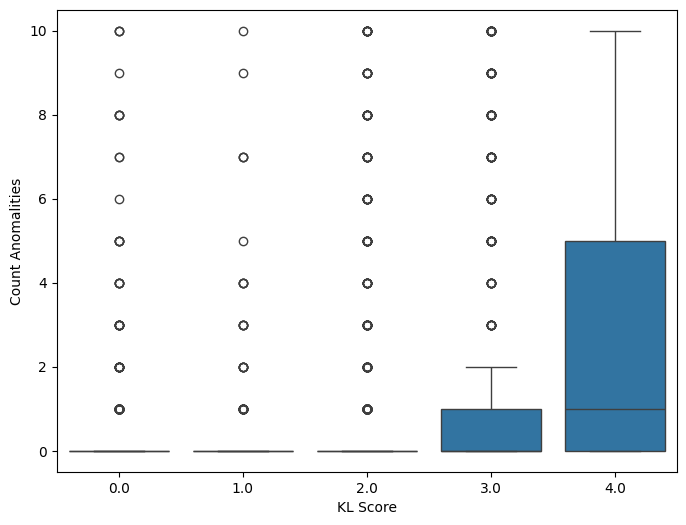

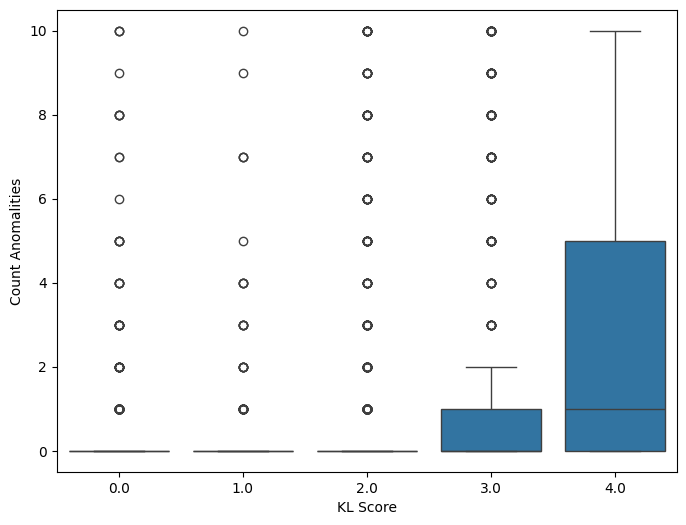

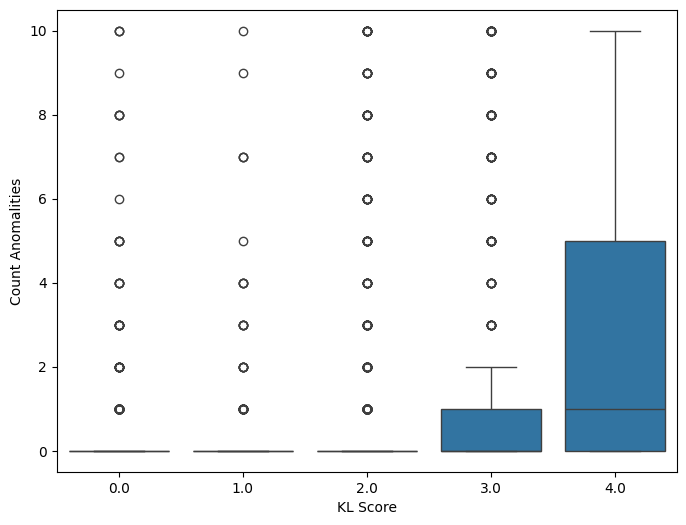

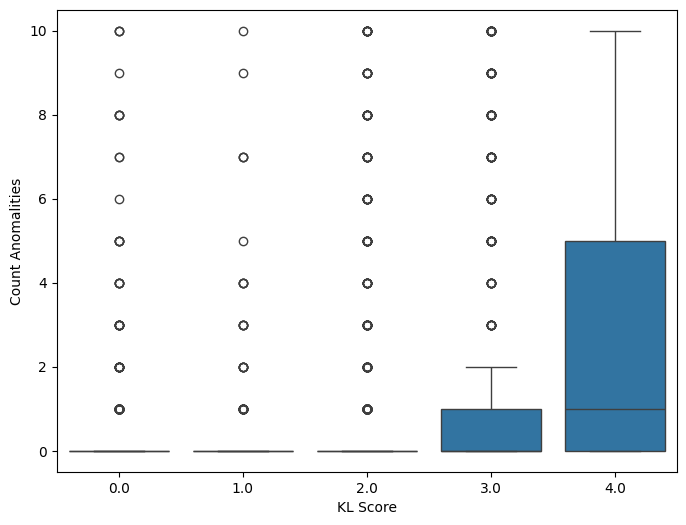

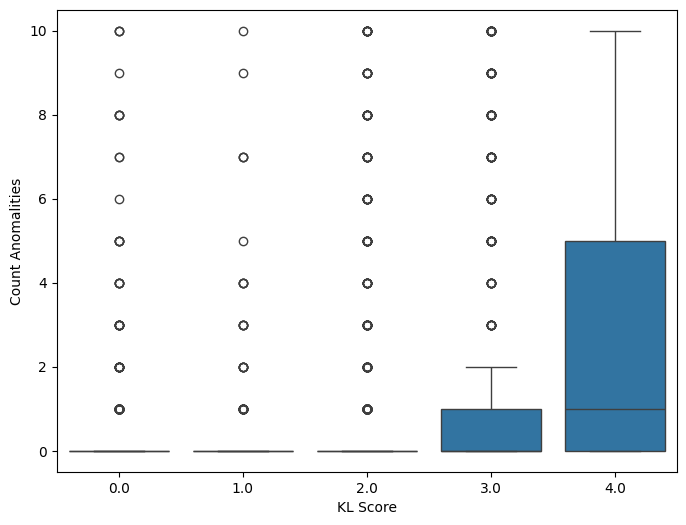

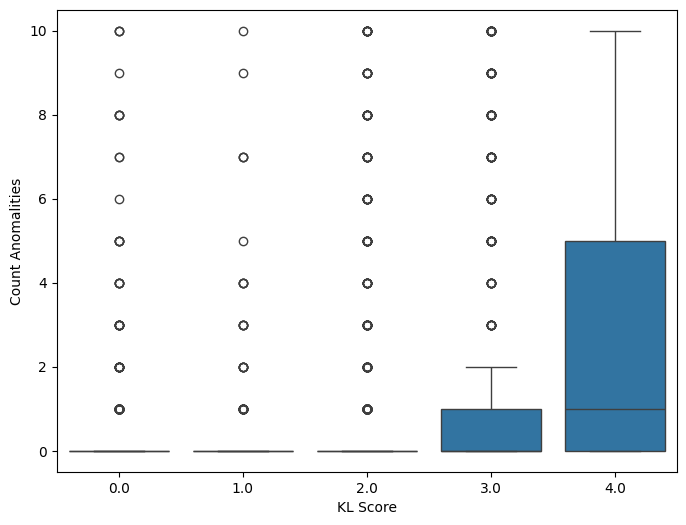

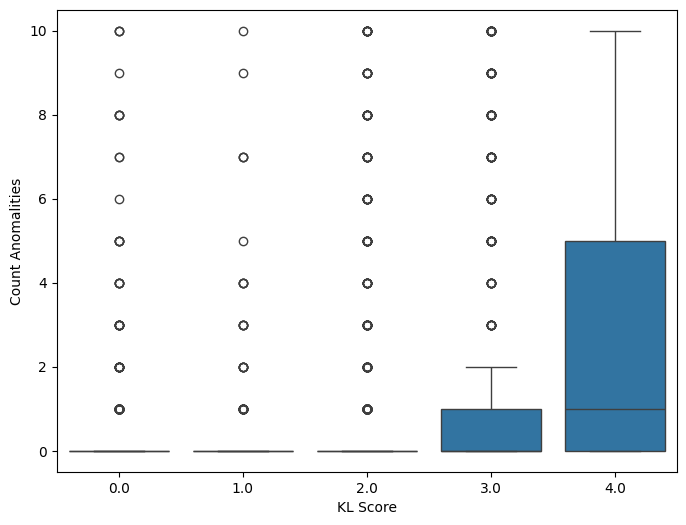

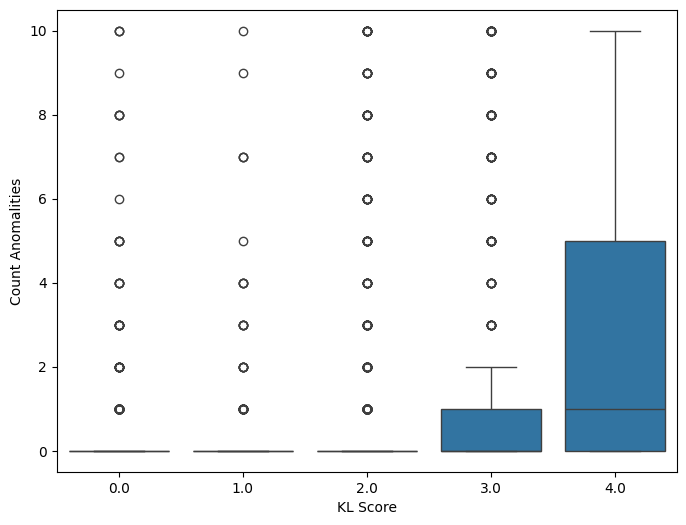

In [12]:
l = ['col_1001', 'col_71530', 'col_138647',
       'col_875688', 'col_985772', 'col_44', 'col_34', 'col_193', 'col_244959',
       'col_8765']

x = 'label'
x_title = 'KL Score'

#if I have a boxplot for every "seed" is there a better way of visualizing the variability that we see for the same samples across seeds?
# specifically also for the cases where we have inconsistent anomalie "labels"

for i in l:
    boxplot(df, x = x)

In [13]:
x = 'sim'
y = 'av'
x_title = 'CLIP Sim Score'
y_title = 'Average AS'

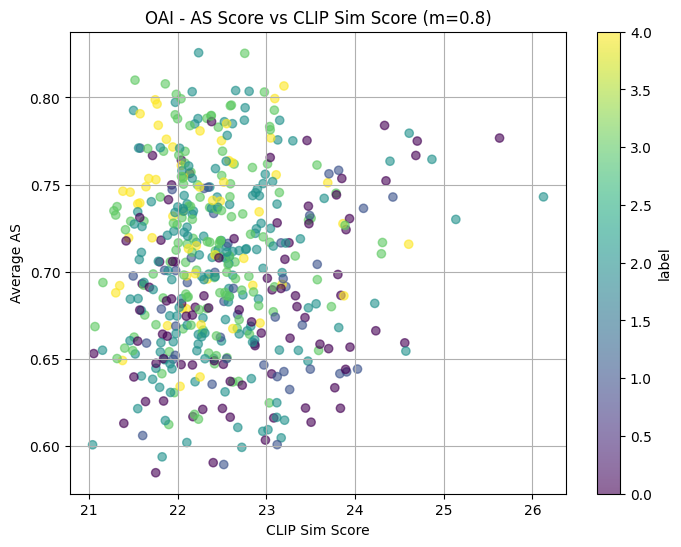

In [14]:
scatter_plot(df[(df['anoms_count']<=5) & (df['anoms_count']>0)], x=x, y=y, x_title=x_title,y_title=y_title, label='label', title="OAI - AS Score vs CLIP Sim Score (m=0.8)")

#### Pairplots

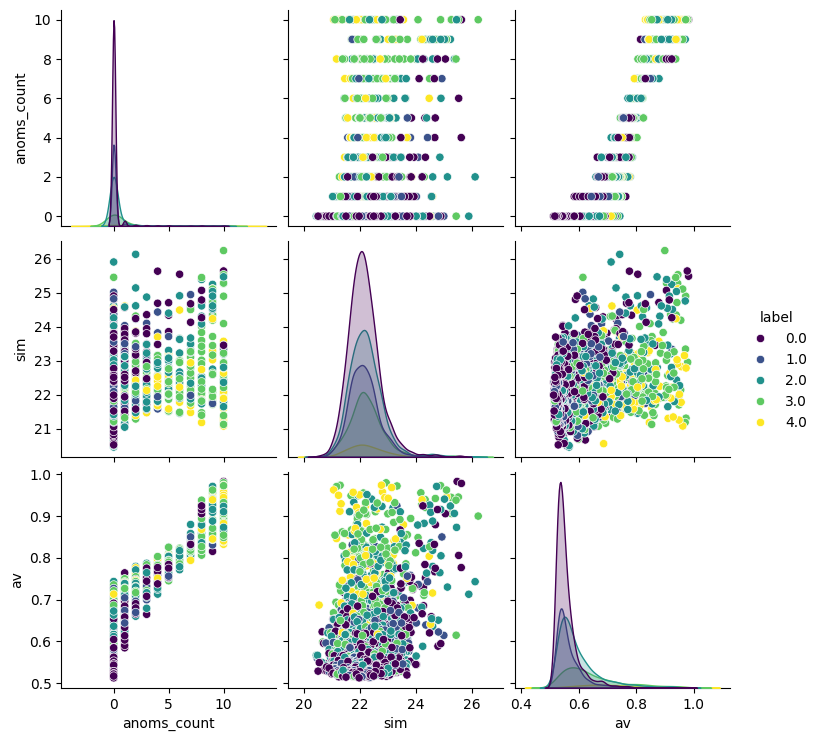

In [15]:
sns.pairplot(df[values], hue='label', palette='viridis')
plt.show()

In [16]:
# g = sns.PairGrid(df[values], hue='label')
# g.map_lower(sns.boxplot) 
# g.map_diag(sns.histplot)  # Apply histogram for the diagonal
# g.add_legend()
# plt.show()

# Example X-Rays

## High CLIP Similarity Score for Different KL scores

In [ ]:
ids = df[df['sim>95th']>0]

file_name = pseudolabel_name.rsplit('.', maxsplit=1)[0] + '_' + 'simscore_over_95th.csv'
save_path_ids = os.path.join(SAVE_PATH, 'eval', STAGE)
os.makedirs(save_path_ids, exist_ok=True)

ids.to_csv(os.path.join(save_path_ids, file_name), index=False)

In [19]:
DATAPATH = config.CHENETAL_DATAPATH

In [25]:
ids.head()

,Unnamed: 0,id,label,col_1001,col_71530,col_138647,col_875688,col_985772,col_44,col_34,...,anom_875688,anom_985772,anom_44,anom_34,anom_193,anom_244959,anom_8765,anoms_count,sim,sim>95th
0,0,0/9877295L.png,0.0,1.000000,0.977431,0.965298,0.989834,0.984138,0.982481,0.978939,...,1,1,1,1,1,1,1,10,25.482737,1
1,1,0/9454100L.png,0.0,0.989189,0.967715,0.969509,0.990447,0.981055,0.959838,0.982825,...,1,1,1,1,1,1,1,10,25.635155,1
2,2,3/9663614L.png,3.0,0.986589,0.959945,0.983334,0.997232,0.955324,0.953749,0.970694,...,1,1,1,1,1,1,1,10,23.337206,1
9,9,3/9645958L.png,3.0,0.948717,0.894766,0.978922,0.945069,0.962097,0.927947,0.960599,...,1,1,1,1,1,1,1,10,25.527349,1
12,12,2/9022902L.png,2.0,0.938235,0.928745,0.956539,0.908478,0.910284,0.953653,0.898958,...,1,1,1,1,1,1,1,10,23.193996,1


In [31]:
img = os.path.join(DATAPATH, 'train', ids['id'].iloc[0])
img = load_image(img)

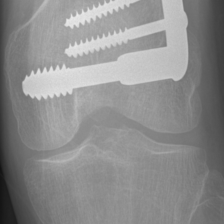

In [32]:
img

In [40]:
pseudolabel_name = "ss_training_mod_2_epoch_400_margin_0.8"

In [43]:
ids['label'].value_counts()

label
0.0    101
2.0     80
3.0     50
1.0     42
4.0     16
Name: count, dtype: int64

In [44]:
img_save_path = os.path.join(SAVE_PATH, 'images', STAGE)
os.makedirs(img_save_path, exist_ok=True)

for i in range(1, 5):
    l_img = []
    temp_img_savepath = os.path.join(img_save_path, str(i))
    os.makedirs(temp_img_savepath, exist_ok=True)
    for j in range(len(ids['id'])):
        #print(int(ids['label'].iloc[j]))
        if int(ids['label'].iloc[j]) == int(i):
            l_img.append(ids['id'].iloc[j])
        
    for filename in l_img:
        img = load_image(os.path.join(DATAPATH, 'train', filename))
        save_name = os.path.join(temp_img_savepath, f'{pseudolabel_name}_over95thpercentile{filename.split('/')[1]}')
        img.save(save_name)
        
    
        
    


SAME FOR mod_st???